# Attempt 1

We are solving the following system of equations:
$$\frac{\Omega_i^k - \Omega^{k-1}_i}{\tau} - \frac{v^{k-1}\xi_i}{\gamma^{k-1}} \frac{\Omega_{i+1}^k - \Omega^{k}_{i-1}}{2h} - \frac{1}{(\gamma^{k-1} h)^2} \left(\left(\frac{\Omega^{k-1}_{i+1} + \Omega^{k-1}_{i}}{2}\right)^3(\Omega_{i+1}^k - \Omega^{k}_{i})  - \left( \frac{\Omega^{k-1}_{i} + \Omega^{k-1}_{i-1}}{2} \right)^3 (\Omega_{i}^k - \Omega^{k}_{i-1})\right) = 0$$

$$\Omega_0^k = 0$$
$$\Omega_{N-1}^k = 1$$

$$  v^k = (\Omega_{N-2}^k)^2 \frac{ \Omega_{N-3}^k}{2\gamma^{k-1} h}   $$

Let's combine the terms

$$ \Omega_{i+1}^k \left( - \frac{v^{k-1}\xi_i}{2\gamma^{k-1} h} - \frac{1}{(\gamma^{k-1} h)^2} \left(\frac{\Omega^{k-1}_{i+1} + \Omega^{k-1}_{i}}{2}\right)^3 \right)  + \Omega_i^k \left( \frac{1}{\tau} +  \frac{1}{(\gamma^{k-1} h)^2}\left(\frac{\Omega^{k-1}_{i+1} + \Omega^{k-1}_{i}}{2}\right)^3 - \frac{1}{(\gamma^{k-1} h)^2}\left( \frac{\Omega^{k-1}_{i} + \Omega^{k-1}_{i-1}}{2} \right)^3 \right) + \Omega_{i-1}^k \left( \frac{v^{k-1}\xi_i}{2\gamma^{k-1} h} -  \frac{1}{(\gamma^{k-1} h)^2} \left( \frac{\Omega^{k-1}_{i} + \Omega^{k-1}_{i-1}}{2} \right)^3 \right) = \frac{\Omega_i^{k-1}}{\tau}$$

So we'll need to solve the system of equations

$$ A(\Omega^{k-1}) \Omega^k = f(\Omega^{k-1})$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

In [98]:
N = 100
xi = np.linspace(0,1,N)
h = 1/(N-1)
W0 = np.sqrt(1 - xi)              # intitial solution of omega
g = 4                             # initial gamma
v0 = W0[N-2]**2*W0[N-3]/g/2/h     # initial velocity
t = 10**(-5)                      # time step

Text(0, 0.5, 'xi')

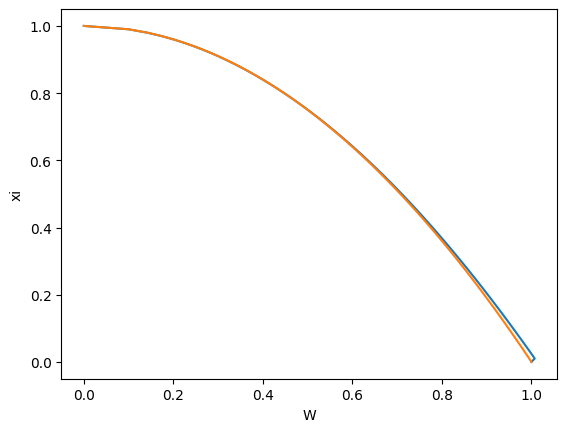

In [99]:
v_prev = v0.copy()
W_prev = W0.copy()
eps = 1
eps_v = 1

n_t = 10**5        # number of time steps
# psi0 = np.empty(n_t+1)
# psi0[0] = - ((W0[0] + W0[1])/2)**3/g*(-W0[0] + W0[1])/h
# t0 = 10**(-3)
# time = [t0]

for j in range(n_t):                # time loop
    # gs.append(g)
    # ts.append(j*t)
    while(eps_v > 10**(-2)):        # loop to approximate the velocity v
        while(eps > 10**(-2)):      # loop to approximate the opening omega
            # upper diagonal
            a1 = np.zeros(N-1)
            a1[1:-1] = - v_prev/g*xi[1:-2]/2/h - 1/(g*h)**2*((W_prev[1:-2] + W_prev[2:-1])/2)**3

            # main diagonal
            a0 = np.ones(N)
            a0[1:-1] = 1/t + 1/(g*h)**2*((W_prev[1:N-1] + W_prev[2:])/2)**3 - 1/(g*h)**2*((W_prev[0:N-2] + W_prev[1:N-1])/2)**3

            # lower diagonal
            a_1 = np.zeros(N-1)
            a_1[:-1] = v_prev/g*xi[1:-1]/2/h - 1/(g*h)**2*((W_prev[:-2] + W_prev[1:-1])/2)**3

            # right hand side
            f = np.zeros(N)
            f[0] = 1
            f[-1] = 0
            f[1:-1] = W_prev[1:-1]/t

            # making matrix and solving the system
            k = [a_1,a0, a1]
            offset = [-1,0,1]
            A = diags(k,offset, format = 'csr')
            W = spsolve(A, f)

            # error of solution
            eps = np.sqrt(((W - W_prev)**2).mean())
            
            W_prev = W.copy()

        # getting new velocity
        v = W_prev[N-2]**2*W_prev[N-3]/g/2/h
        eps_v = np.abs(v - v_prev)
        v_prev = v.copy()

    # getting new gamma
    g = g + v_prev*t
    # time.append(time[j] + t)
    # psi0[j+1] = - ((W[0] + W[1])/2)**3/g*(-W[0] + W[1])/h

plt.figure()
plt.plot(W_prev, xi)
plt.plot(W0, xi)
plt.xlabel('W')
plt.ylabel('xi')

# Attempt 1.1

In [319]:
N = 10
xi = np.linspace(0,1,N)
h = 1/(N-1)
W0 = np.sqrt(1 - xi)              # intitial solution of omega
g = 4                             # initial gamma
v0 = W0[N-2]**2*W0[N-3]/g/2/h     # initial velocity
t = 10**(-7)                      # time step

[ 0.         -8.78063418 -6.81093147 -5.09107666 -3.62100476 -2.40059926
 -1.4296195  -0.7074292  -0.22980474  0.        ]
[ 0.00000000e+00 -1.57949663e+03 -5.53812909e+04 -2.05935912e+04
 -6.71276235e+03 -1.84456604e+03 -4.02496605e+02 -6.30515414e+01
 -5.69382229e+00  0.00000000e+00]
[ 0.00000000e+00 -6.29769985e+18  2.99000276e+18 -2.09201383e+19
 -3.50421380e+17 -3.39471808e+15 -1.62578158e+13 -3.05350048e+10
 -1.56204073e+07  0.00000000e+00]
[ 0.00000000e+00 -7.82715424e+74 -8.72941074e+76  5.98632348e+76
 -1.29536061e+77 -9.91711619e+69 -8.56622846e+61 -4.45434149e+52
 -5.51258711e+41  0.00000000e+00]
[ 0.00000000e+000 -3.74053111e+307 -3.61600637e+307 -4.08945511e+307
  1.63259593e+308 -1.78171376e+308 -6.12091954e+279 -3.40748271e+247
 -2.49120280e+210  0.00000000e+000]
[  0.  nan  nan -inf  nan  nan  nan  nan  nan   0.]


C:\Users\User\AppData\Local\Temp\ipykernel_4476\3212063572.py:50: RuntimeWarning: overflow encountered in square
  eps = np.sqrt(((W - W_prev)**2).mean())
C:\Users\User\AppData\Local\Temp\ipykernel_4476\3212063572.py:25: RuntimeWarning: overflow encountered in power
  a1[1:-1] = - v_prev/g*xi[1:-2]/2/h - 1/(g*h)**2*((W_prev[1:-2] + W_prev[2:-1])/2)**3
C:\Users\User\AppData\Local\Temp\ipykernel_4476\3212063572.py:28: RuntimeWarning: overflow encountered in power
  a0[1:-1] = 1/t + 1/(g*h)**2*((W_prev[1:N-1] + W_prev[2:])/2)**3 - 1/(g*h)**2*((W_prev[0:N-2] + W_prev[1:N-1])/2)**3
C:\Users\User\AppData\Local\Temp\ipykernel_4476\3212063572.py:28: RuntimeWarning: invalid value encountered in subtract
  a0[1:-1] = 1/t + 1/(g*h)**2*((W_prev[1:N-1] + W_prev[2:])/2)**3 - 1/(g*h)**2*((W_prev[0:N-2] + W_prev[1:N-1])/2)**3
C:\Users\User\AppData\Local\Temp\ipykernel_4476\3212063572.py:31: RuntimeWarning: overflow encountered in power
  a_1[:-1] = v_prev/g*xi[1:-1]/2/h - 1/(g*h)**2*((W_prev[:-2] + W_

Text(0, 0.5, 'xi')

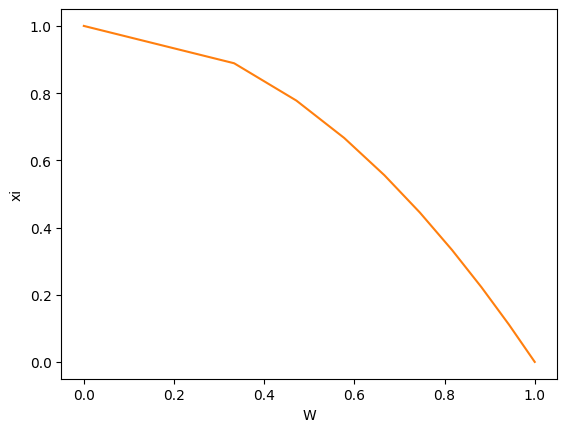

In [326]:
v_prev = v0.copy()
W_prev = W0.copy()
eps = 1
eps_v = 1
errs = []

n_t = 10**5        # number of time steps
# psi0 = np.empty(n_t+1)
# psi0[0] = - ((W0[0] + W0[1])/2)**3/g*(-W0[0] + W0[1])/h
# t0 = 10**(-3)
# time = [t0]

# for j in range(n_t):                # time loop
    # gs.append(g)
    # ts.append(j*t)
    # while(eps_v > 10**(-2)):        # loop to approximate the velocity v
        # while(eps > 10**(-2)):      # loop to approximate the opening omega
            # upper diagonal
i = 0
max_iter = 100
while eps > 10**(-2):
    # print(i)
    i += 1
    a1 = np.zeros(N-1)
    a1[1:-1] = - v_prev/g*xi[1:-2]/2/h - 1/(g*h)**2*((W_prev[1:-2] + W_prev[2:-1])/2)**3
    # main diagonal
    a0 = np.ones(N)
    a0[1:-1] = 1/t + 1/(g*h)**2*((W_prev[1:N-1] + W_prev[2:])/2)**3 - 1/(g*h)**2*((W_prev[0:N-2] + W_prev[1:N-1])/2)**3
    # lower diagonal
    a_1 = np.zeros(N-1)
    a_1[:-1] = v_prev/g*xi[1:-1]/2/h - 1/(g*h)**2*((W_prev[:-2] + W_prev[1:-1])/2)**3
    # right hand side
    f = np.zeros(N)
    f[0] = 1
    f[-1] = 0
    f[1:-1] = W_prev[1:-1]/t
    
    # making matrix and solving the system
    k = [a_1,a0, a1]
    offset = [-1,0,1]
    A = diags(k,offset, format = 'csr')
    # if i == 1:
        # W = spsolve(A, f)
    # else:
        # W = W_prev - A@W_prev + f
    # error of solution
    # eps = np.sqrt(((W - W_prev)**2).mean())
    # A_inv = np.linalg.inv(A)
    W = W_prev -  A@W_prev + f
    eps = np.sqrt(((W - W_prev)**2).mean())
    errs.append(eps)
    print(A@W_prev - f)
    W_prev = W.copy()
    if i == max_iter:
        break

# print(A@W_prev - f)
# print(A@W - f)
    
# W_prev = W.copy()
# # getting new velocity
# v = W_prev[N-2]**2*W_prev[N-3]/g/2/h
# eps_v = np.abs(v - v_prev)
# v_prev = v.copy()

    # getting new gamma
    # g = g + v_prev*t
    # time.append(time[j] + t)
    # psi0[j+1] = - ((W[0] + W[1])/2)**3/g*(-W[0] + W[1])/h

plt.figure()
plt.plot(W_prev, xi)
plt.plot(W0, xi)
plt.xlabel('W')
plt.ylabel('xi')

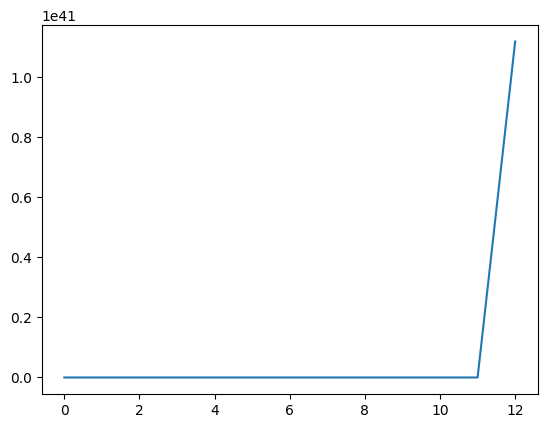

In [324]:
plt.plot(errs)

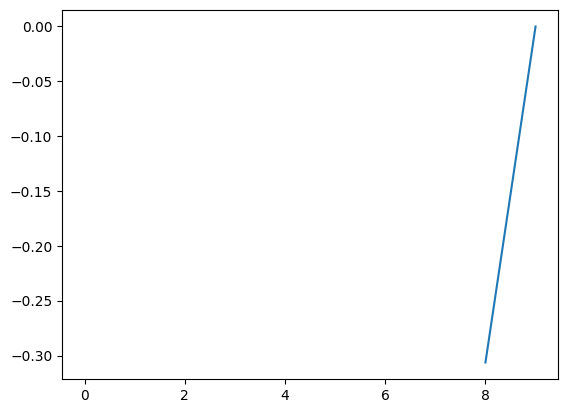

In [325]:
plt.plot(W - W0)

# Attempt 1.3
newton method

In [119]:
W0

array([1.        , 0.94280904, 0.8819171 , 0.81649658, 0.74535599,
       0.66666667, 0.57735027, 0.47140452, 0.33333333, 0.        ])

# Attempt 2
We are solving the following system of equations:
$$\frac{\Omega_i^k - \Omega^{k-1}_i}{\tau} - \frac{v^{k-1}\xi_i}{\gamma^{k-1}} \frac{\Omega_{i+1}^k - \Omega^{k}_{i-1}}{2h} - \frac{1}{(\gamma^{k-1} h)^2} \left(\left(\frac{\Omega^{k-1}_{i+1} + \Omega^{k-1}_{i}}{2}\right)^3(\Omega_{i+1}^k - \Omega^{k}_{i})  - \left( \frac{\Omega^{k-1}_{i} + \Omega^{k-1}_{i-1}}{2} \right)^3 (\Omega_{i}^k - \Omega^{k}_{i-1})\right) = 0$$

$$\Omega_{-1}^k = 0$$
$$\Omega_{N}^k = 1$$

$$ v^k = (\Omega_{N-1}^k)^2 \frac{ \Omega_{N-2}^k}{2\gamma^{k-1} h}  $$

Let's introduce new variable $\Delta \Omega_i = \Omega_i^k -  \Omega_i^{k-1} $ and rewrite equations. Let $\Omega_i^0 = \Omega_i^{k-1}$.

$$ \Delta \Omega_i - \frac{\tau v^{k-1}\xi_i}{2\gamma^{k-1} h} (\Delta \Omega_{i+1} - \Delta \Omega_{i-1}) - \frac{\tau}{(\gamma^{k-1} h)^2} \left(  \left(\frac{\Omega^{0}_{i+1} + \Omega^{0}_{i}}{2}\right)^3 (\Delta\Omega_{i+1} -\Delta \Omega_{i}) - \left( \frac{\Omega^{0}_{i} + \Omega^{0}_{i-1}}{2} \right)^3 (\Delta\Omega_{i} - \Delta\Omega_{i-1})  \right) =  \frac{\tau v^{k-1}\xi_i}{2\gamma^{k-1} h} (\Omega_{i+1}^0 - \Omega_{i-1}^0) + \frac{\tau}{(\gamma^{k-1} h)^2}\left(  \left(\frac{\Omega^{0}_{i+1} + \Omega^{0}_{i}}{2}\right)^3 (\Omega_{i+1}^0 - \Omega_{i}^0) - \left( \frac{\Omega^{0}_{i} + \Omega^{0}_{i-1}}{2} \right)^3 (\Omega_{i}^0 - \Omega_{i-1}^0) \right)$$

Let's combine the terms

$$ \Delta \Omega_{i+1} \left( - \frac{\tau v^{k-1}\xi_i}{2\gamma^{k-1} h} - \frac{\tau}{(\gamma^{k-1} h)^2} \left(\frac{\Omega^{0}_{i+1} + \Omega^{0}_{i}}{2}\right)^3 \right)  + \Delta \Omega_i \left( 1 +  \frac{\tau}{(\gamma^{k-1} h)^2}\left(\frac{\Omega^{0}_{i+1} + \Omega^{0}_{i}}{2}\right)^3 - \frac{\tau}{(\gamma^{k-1} h)^2}\left( \frac{\Omega^{0}_{i} + \Omega^{0}_{i-1}}{2} \right)^3 \right) + \Delta \Omega_{i-1} \left( \frac{\tau v^{k-1}\xi_i}{2\gamma^{k-1} h} -  \frac{1}{(\gamma^{k-1} h)^2} \left( \frac{\Omega^{0}_{i} + \Omega^{0}_{i-1}}{2} \right)^3 \right) = \frac{\tau v^{k-1}\xi_i}{2\gamma^{k-1} h} (\Omega_{i+1}^0 - \Omega_{i-1}^0) + \frac{\tau}{(\gamma^{k-1} h)^2}\left(  \left(\frac{\Omega^{0}_{i+1} + \Omega^{0}_{i}}{2}\right)^3 (\Omega_{i+1}^0 - \Omega_{i}^0) - \left( \frac{\Omega^{0}_{i} + \Omega^{0}_{i-1}}{2} \right)^3 (\Omega_{i}^0 - \Omega_{i-1}^0) \right)$$

So we'll need to solve the system of equations

$$ A(\Omega^0) \Delta \Omega = f(\Omega^0)$$

In [331]:
# k_{i+1/2} = ((omega(i+1) + omega(i))/2)^3
def K(w):
    k = np.empty(w.shape[0] + 1)
    k[0] = (1 + w[0])/2
    k[-1] = w[-1]/2
    k[1:-1] = (w[:-1] + w[1:])/2
    return k**3

# psi_{k+1/2}
# def psi(w, g):
#     psi = np.empty(w.shape[0] + 1)
#     k = K(w)
#     psi[0] = - k[0]*(w[0] - 1)/(h*g)
#     psi[-1] = - k[-1]*w[-1]/(h*g)
#     psi[1:-1] = - k[1:-1]*(w[2:] - w[1:-1])/(h*g)
#     return psi

In [334]:
N = 10
h = 1/(N+1)
xi = np.linspace(h, 1 - h, N)
W0 = np.sqrt(1 - xi)              # intitial solution of omega
tau = 10**(-4)                    # time step
g = 4                             # initial gamma
v0 = W0[-1]**2*W0[-2]/g/2/h       # initial velocity

# useful coeffitients
a = tau/(g*h)**2
b = tau*v0/(2*g*h)

W_prev = W0.copy()

errs = []
err = 1

# for j in range(nt)            # time loop
for i in range(1000):         # solving nonlinear equation for given time step

    # making matrix A
    
    k = K(W_prev)

    k0 = 1 + a*(k[1:] - k[:-1])
    k1 = -b*xi[:-1] - a*k[1:-1]
    k_1 = b*xi[1:] - a*k[1:-1]

    A = diags([k_1, k0, k1],[-1,0,1], format = 'csr')

    # right-hand side
    
    f = np.empty(N)
    f[0] = b*xi[0]*(W_prev[1] - 1) + a*(k[1]*(W_prev[1] - W0[0]) - k[0]*(W_prev[0] - 1))
    f[1:-1] = b*xi[1:-1]*(W_prev[2:] - W_prev[:-2]) + a*(k[2:-1]*(W_prev[2:] - W_prev[1:-1]) - k[1:-2]*(W_prev[1:-1] - W_prev[:-2]))
    f[-1] = b*xi[-1]*(-W_prev[-1]) + a*(k[-1]*(-W_prev[-1]) - k[-2]*(W_prev[-1] - W_prev[-2]))

    # solving system
    dW = spsolve(A, f)

    # new solution
    W_next = W_prev + dW

    err = np.sqrt(((W_next - W_prev)**2).mean())
    errs.append(err)

    if err > 1:
        print('error: ', err)
        break

    W_prev = W_next.copy()

# print('a: ', a)
# print('b: ', b)

[1.         0.95633607 0.90750641 0.85572849 0.80056378 0.74128362
 0.67680703 0.60546808 0.52445712 0.42828503 0.30329581 0.        ]


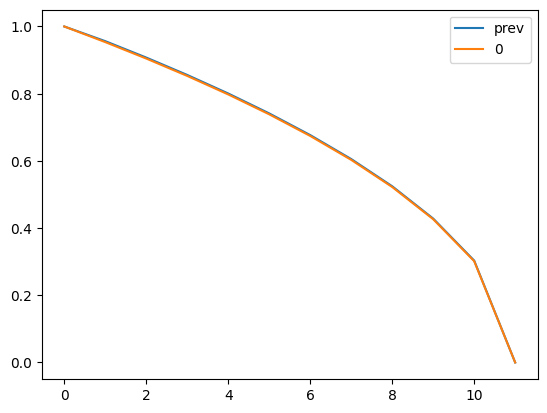

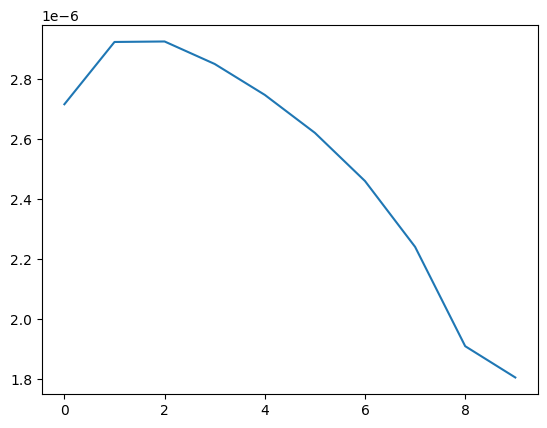

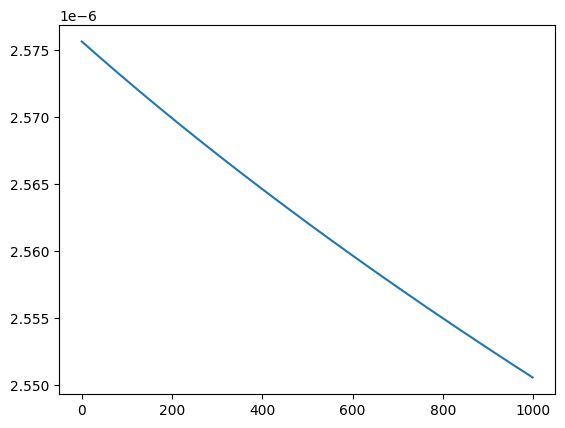

In [335]:
u1 = np.ones(1)
u1 = np.append(u1, W_prev)
u1 = np.append(u1, 0)

u0 = np.ones(1)
u0 = np.append(u0, W0)
u0 = np.append(u0, 0)
print(u1)

plt.plot(u1, label = 'prev')
plt.plot(u0, label = '0')
plt.legend()
plt.figure()
plt.plot(dW)
plt.figure()
plt.plot(errs)

# Attempt 2.1
simple iteration

In [339]:
def K(w):
    k = np.empty(w.shape[0] + 1)
    k[0] = (1 + w[0])/2
    k[-1] = w[-1]/2
    k[1:-1] = (w[:-1] + w[1:])/2
    return k**3

In [340]:
N = 1000
h = 1/(N+1)
xi = np.linspace(h, 1 - h, N)
W0 = np.sqrt(1 - xi)              # intitial solution of omega
tau = 10**(-5)                    # time step
g = 4                             # initial gamma
v0 = W0[-1]**2*W0[-2]/g/2/h       # initial velocity

# useful coeffitients
a = tau/(g*h)**2
b = tau*v0/(2*g*h)

W_prev = W0.copy()

errs = []
err = 1

dW_prev = np.zeros(N)
# for j in range(nt)            # time loop

steps = 0
max_iter = 1000
while err > 10**(-8):         # solving nonlinear equation for given time step

    # making matrix A
    
    k = K(W_prev)

    k0 = 1 + a*(k[1:] - k[:-1])
    k1 = -b*xi[:-1] - a*k[1:-1]
    k_1 = b*xi[1:] - a*k[1:-1]

    A = diags([k_1, k0, k1],[-1,0,1], format = 'csr')

    # right-hand side
    
    f = np.empty(N)
    f[0] = b*xi[0]*(W_prev[1] - 1) + a*(k[1]*(W_prev[1] - W0[0]) - k[0]*(W_prev[0] - 1))
    f[1:-1] = b*xi[1:-1]*(W_prev[2:] - W_prev[:-2]) + a*(k[2:-1]*(W_prev[2:] - W_prev[1:-1]) - k[1:-2]*(W_prev[1:-1] - W_prev[:-2]))
    f[-1] = b*xi[-1]*(-W_prev[-2]) + a*(k[-1]*(-W_prev[-1]) - k[-2]*(W_prev[-1] - W_prev[-2]))

    # solving system
    # dW = spsolve(A, f)

    dW = dW_prev - A@dW_prev + f
    
    # new solution
    # W_next = W_prev + dW

    err = np.sqrt(((dW - dW_prev)**2).mean())
    errs.append(err)

    if err > 1:
        break

    # W_prev = W_next.copy()
    dW_prev = dW.copy()

    steps += 1
    if steps == max_iter:
        break

W_prev = W0 + dW
print(steps, err)

84 1.062377357107137


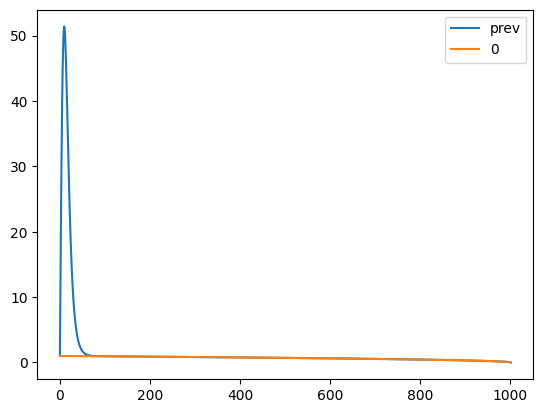

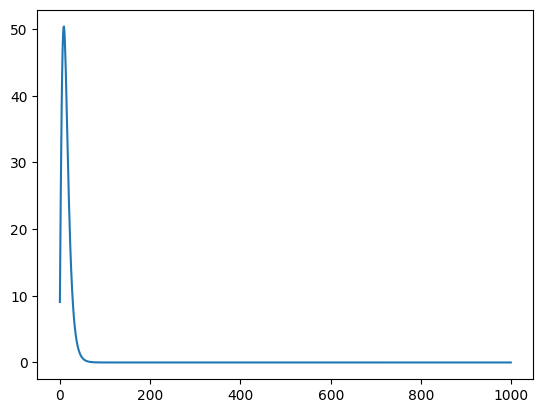

In [341]:
u1 = np.ones(1)
u1 = np.append(u1, W_prev)
u1 = np.append(u1, 0)

u0 = np.ones(1)
u0 = np.append(u0, W0)
u0 = np.append(u0, 0)
# print(u1)

plt.plot(u1, label = 'prev')
plt.plot(u0, label = '0')
plt.legend()
plt.figure()
plt.plot(dW)

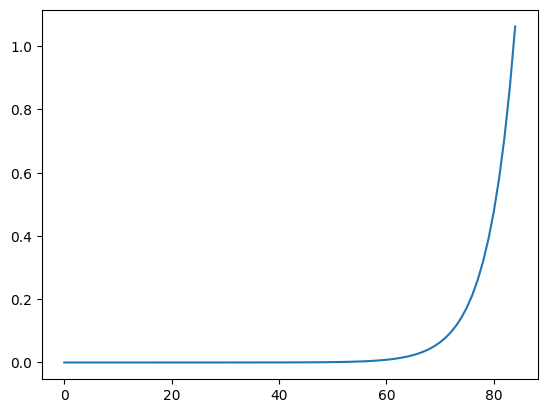

In [342]:
plt.plot(errs)

# Attempt 2.2
Newton method

In [336]:
N = 10
h = 1/(N+1)
xi = np.linspace(h, 1 - h, N)
W0 = np.sqrt(1 - xi)              # intitial solution of omega
tau = 10**(-8)                    # time step
g = 0.1                           # initial gamma
v0 = W0[-1]**2*W0[-2]/g/2/h       # initial velocity

# useful coeffitients
a = tau/(g*h)**2
b = tau*v0/(2*g*h)

W_prev = W0.copy()
W1 = W0.copy()

errs = []
err = 1

dW_prev = np.zeros(N)
# for j in range(nt)            # time loop

steps = 0
max_iter = 1000
while err > 10**(-8):         # solving nonlinear equation for given time step

    # making matrix A
    
    k = K(W_prev)

    k0 = 1 + a*(k[1:] - k[:-1])
    k1 = -b*xi[:-1] - a*k[1:-1]
    k_1 = b*xi[1:] - a*k[1:-1]

    A = diags([k_1, k0, k1],[-1,0,1]).toarray()

    # right-hand side
    
    f = np.empty(N)
    f[0] = b*xi[0]*(W_prev[1] - 1) + a*(k[1]*(W_prev[1] - W0[0]) - k[0]*(W_prev[0] - 1))
    f[1:-1] = b*xi[1:-1]*(W_prev[2:] - W_prev[:-2]) + a*(k[2:-1]*(W_prev[2:] - W_prev[1:-1]) - k[1:-2]*(W_prev[1:-1] - W_prev[:-2]))
    f[-1] = b*xi[-1]*(-W_prev[-2]) + a*(k[-1]*(-W_prev[-1]) - k[-2]*(W_prev[-1] - W_prev[-2]))

    # solving system
    # dW = spsolve(A, f)
    # print(A.shape)
    # print(A)
    A_inv = np.linalg.inv(A)

    dW = dW_prev - A_inv @ ( A@dW_prev - f)
    
    # print(A@dW_prev - f)
    # new solution
    
    # W_next = W1 + dW
    # print(dW, dW_prev)
    err = np.sqrt(((dW - dW_prev)**2).mean())
    errs.append(err)

    if err > 1:
        break

    # W1 = W_next.copy()
    dW_prev = dW.copy()

    steps += 1
    if steps == max_iter:
        break

W_prev = W0 + dW
print(steps, err)

2 5.799238152015798e-23


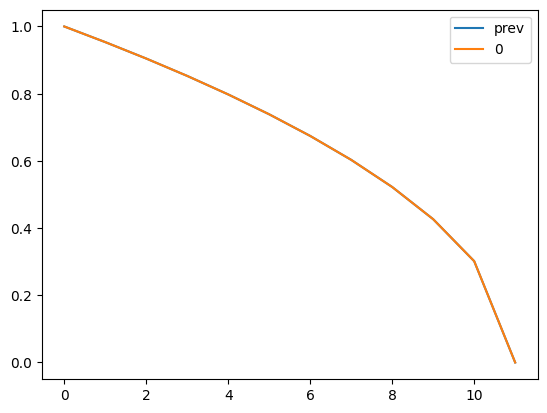

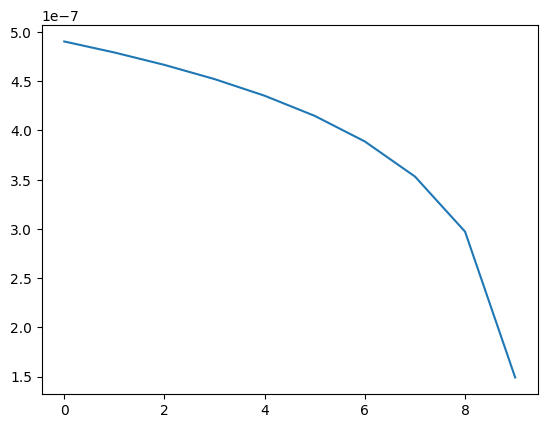

In [337]:
u1 = np.ones(1)
u1 = np.append(u1, W_prev)
u1 = np.append(u1, 0)

u0 = np.ones(1)
u0 = np.append(u0, W0)
u0 = np.append(u0, 0)
# print(u1)

plt.plot(u1, label = 'prev')
plt.plot(u0, label = '0')
plt.legend()
plt.figure()
plt.plot(dW)

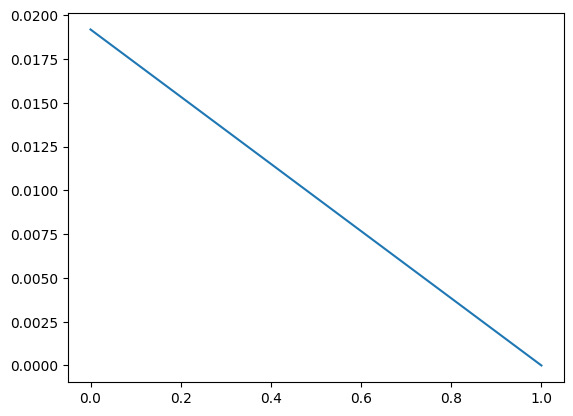

In [264]:
plt.plot(errs)

# Attempt 2.3

In [2]:
def K(w):
    k = np.empty(w.shape[0] + 1)
    k[0] = (1 + w[0])/2
    k[-1] = w[-1]/2
    k[1:-1] = (w[:-1] + w[1:])/2
    return k**3

def dK(w):
    k = K(w)
    # print(k)
    dk = 3/2*k**(2/3)
    return dk

def make_A(w, v, g, tau, h):
    a = tau/(g*h)**2
    b = tau*v/(2*g*h)
    k = K(w)
    k0 = 1 + a*(k[1:] - k[:-1])
    k1 = -b*xi[:-1] - a*k[1:-1]
    k_1 = b*xi[1:] - a*k[1:-1]
    A = diags([k_1, k0, k1],[-1,0,1]).toarray()
    return A

# right-hand side
def make_f(w, v, g, tau, h):
    a = tau/(g*h)**2
    b = tau*v/(2*g*h)
    k = K(w)
    f = np.empty(N)
    f[0] = b*xi[0]*(W_prev[1] - 1) + a*(k[1]*(W_prev[1] - W_prev[0]) - k[0]*(W_prev[0] - 1))
    f[1:-1] = b*xi[1:-1]*(W_prev[2:] - W_prev[:-2]) + a*(k[2:-1]*(W_prev[2:] - W_prev[1:-1]) - k[1:-2]*(W_prev[1:-1] - W_prev[:-2]))
    f[-1] = b*xi[-1]*(-W_prev[-2]) + a*(k[-1]*(-W_prev[-1]) - k[-2]*(W_prev[-1] - W_prev[-2]))
    return f

# здесь в w уже входит dw
def make_F(A, w, dw, v, g, tau, h):
    b = tau/(g*h)**2
    a = tau*v/(2*g*h)
    k = K(w)
    dk = dK(w)
    # F = A.copy()
    
    # main diagonal
    F0 = np.empty_like(w)
    F0[0] = A[0,0] + dw[0]*b*(dk[1] - dk[0]) - dw[1]*b*dk[1] - b*(-(dk[1] + dk[0]) + dk[1]*(w[1] - w[0]) -dk[0]*(w[0] - 1))
    F0[1:-1] = np.diag(A)[1:-1] - dw[2:]*b*dk[2:-1] + dw[1:-1]*b*(dk[2:-1] - dk[1:-2]) - dw[:-2]*b*dk[1:-2] - b*(-(k[2:-1] + dk[1:-2]) + k[2:-1]*(w[2:] - w[1:-1]) - k[1:-2]*(w[1:-1] - w[:-2]))
    F0[-1] = A[-1,-1] - dw[-2]*b*dk[-2] + dw[-1]*b*(dk[-1] - dk[-2]) - b*(-(dk[-2] + dk[-1]) - dk[-1]*w[-1] - dk[-2]*(w[-1] - w[-2]))

    # upper diagonal
    # F1[0] = A[0,1] - b*dk[1]*dw[1] +b*dk[1]*dw[0] - (a*xi[0] + b*k[1] + b*dk[1]*())
    # F1[1:] = np.diag(A, 1)[1:] - b*dk[2:-1]*dw[2:] + b*dk[2:-1]*dw[1:-1] - (a*xi[1:-1] + b*k[2:-1] + b*dk[2:-1]*(w[2:] - w[1:-1]))
    F1 = np.diag(A, 1) - b*dk[1:-1]*dw[1:] + b*dk[1:-1]*dw[:-1] - (a*xi[:-1] + b*k[1:-1] + b*dk[1:-1]*(w[1:] - w[:-1]))

    #lower diagonal
    F2 = np.diag(A, -1) - dw[1:]*b*dk[1:-1] - dw[:-1]*b*dk[1:-1] - (a*xi[1:] + b*k[1:-1] - b*(w[1:] - w[:-1])*dk[1:-1])
    
    F = diags([F2, F0, F1],[-1,0,1]).toarray()
    return F

In [13]:
N = 10
h = 1/(N+1)
xi = np.linspace(h, 1 - h, N)
W0 = np.sqrt(1 - xi)              # intitial solution of omega
tau = 10**(-5)                    # time step
g0 = 0.1                             # initial gamma
v0 = W0[-1]**2*W0[-2]/g0/2/h       # initial velocity
t0 = 10**(-3)

# useful coeffitients
# a = tau/(g*h)**2
# b = tau*v0/(2*g*h)

v_prev = v0.copy()
W_prev = W0.copy()
g_prev = g0
# W1 = W0.copy()

errs = []
err = 1

dW_prev = np.zeros(N)
# for j in range(nt)           

ts = []
gs = []
gs.append(g0)
ts.append(t0)

nt = 10000000
for i in range(nt):   # time loop
    steps = 0
    max_iter = 1000
    while err > 10**(-6):         # solving nonlinear equation for given time step
        
        
    
        # making matrix A
        A = make_A(W_prev, v_prev, g_prev, tau, h)
        
        # right-hand side
        f = make_f(W_prev, v_prev, g_prev, tau, h)
        # print(f)
        # solving system
        # dW = spsolve(A, f)
        # print(A.shape)
        # print(A)
        # A_inv = np.linalg.inv(A)
        
        F = make_F(A, W_prev, dW_prev, v_prev, g_prev, tau, h)
        F_inv = np.linalg.inv(F)
        dW = dW_prev - F_inv @ ( A @ dW_prev - f )
        
        # new solution
        W = W_prev + dW
        err = np.sqrt(((dW - dW_prev)**2).mean())
        errs.append(err)
    
        if err > 1:
            break
    
        W_prev = W.copy()
        dW_prev = dW.copy()

        steps += 1
        if steps == max_iter:
            print(i)
            break


    g_prev = g_prev + v_prev*tau
    v_prev = W_prev[-1]**2*W_prev[-2]/g_prev/2/h

    ts.append(t0 + tau*(i+1))
    gs.append(g_prev)

# W_prev = W0 + dW
# print(steps, err)

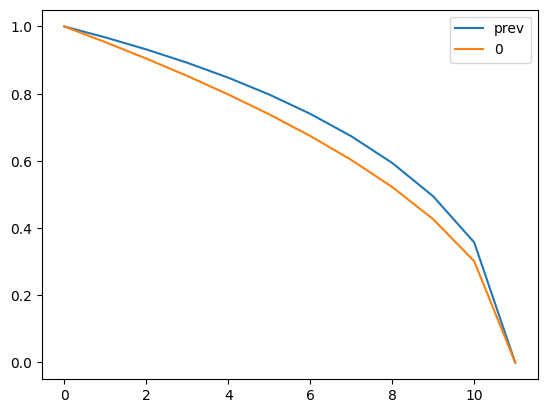

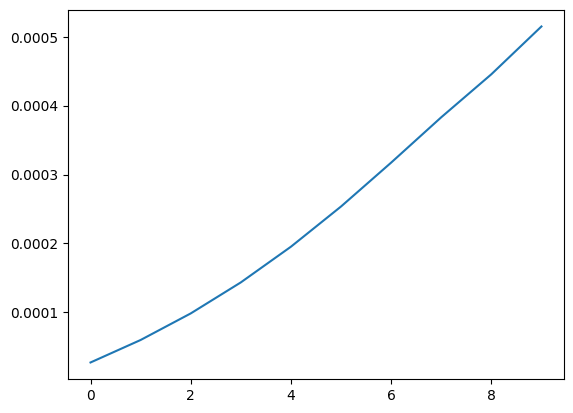

In [14]:
u1 = np.ones(1)
u1 = np.append(u1, W_prev)
u1 = np.append(u1, 0)

u0 = np.ones(1)
u0 = np.append(u0, W0)
u0 = np.append(u0, 0)
# print(u1)

plt.plot(u1, label = 'prev')
plt.plot(u0, label = '0')
plt.legend()
plt.figure()
plt.plot(dW)

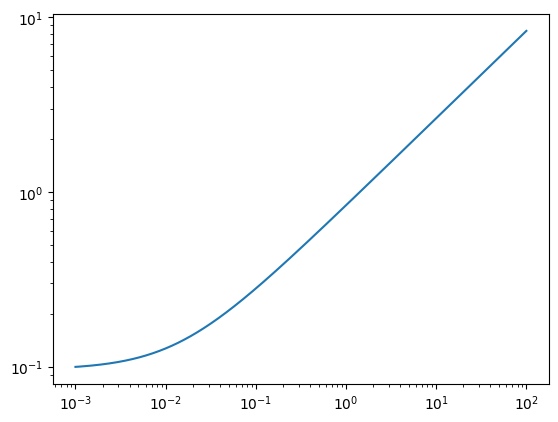

In [15]:
plt.plot(ts, gs)
plt.xscale('log')
plt.yscale('log')

In [9]:
gs[100000:]

[0.8395805276702577]